In [7]:
ls /root/BehaviorStudio/behavior_studio/models/dir1/

20201026-165358_lap_checkpoints.pkl
20201026-165359_lap_checkpoints.pkl
20201026-165400_lap_checkpoints.pkl
20201026-165401_lap_checkpoints.pkl
20201026-165402_lap_checkpoints.pkl
20201026-165403_lap_checkpoints.pkl
20201026-171009_lap_checkpoints.pkl
20201026-171751_lap_checkpoints.pkl
lap_checkpoints.pkl
merged_model_pilotnet_cropped_100_dense_1.h5
merged_model_pilotnet_cropped_100_dense_2.h5
merged_model_tinypilotnet_cropped_100.h5
merged_model_tinypilotnet_cropped_300.h5
model_lstm_tinypilotnet_cropped_150.h5
model_lstm_tinypilotnet_cropped_150_v.h5
model_lstm_tinypilotnet_cropped_150_w.h5
model_lstm_tinypilotnet_cropped_25.h5
model_lstm_tinypilotnet_cropped_50.h5
model_pilotnet_cropped_300.h5
model_pilotnet_cropped_300_v.h5
model_pilotnet_cropped_300_w.h5
model_pilotnet_cropped_v.h5
model_pilotnet_cropped_w.h5
model_smaller_vgg_5classes_biased_cropped_v.h5
model_smaller_vgg_7classes_biased_cropped_w.h5
model_tinypilotnet_cropped_v.h5
model_tinypilotnet_cropped_w.h5
simple_line.dae

In [34]:
import pickle
with open('/root/BehaviorStudio/behavior_studio/models/dir1/merged_model_tinypilotnet_cropped_300_20201027-121538_lap_checkpoints.pkl', 'rb') as f:
    data = pickle.load(f)

    
print()
for point in data:
    print(point)



[0, array([ 53.49646946, -11.89663214]), '0:00:01.040707']
[1, array([ 53.42295413, -15.07822486]), '0:00:02.122451']
[2, array([ 53.42447937, -18.18260261]), '0:00:03.158579']
[3, array([ 53.51432948, -21.29678498]), '0:00:04.174282']
[4, array([ 53.27256143, -24.42610845]), '0:00:05.215002']
[5, array([ 53.44368562, -27.78729899]), '0:00:06.273476']
[6, array([ 53.36260929, -31.19045276]), '0:00:07.289073']
[7, array([ 53.57542369, -35.10413535]), '0:00:08.352401']
[8, array([ 53.34194135, -37.91548123]), '0:00:09.353141']
[9, array([ 53.50918658, -40.7001354 ]), '0:00:10.397925']
[10, array([ 53.51044351, -43.84230742]), '0:00:11.424537']
[11, array([ 53.19720004, -46.78422564]), '0:00:12.460210']
[12, array([ 51.96534777, -49.19577144]), '0:00:13.464001']
[13, array([ 49.37183188, -51.22236524]), '0:00:14.514674']
[14, array([ 46.17178394, -51.84544495]), '0:00:15.532335']
[15, array([ 43.44555146, -50.96015878]), '0:00:16.569235']
[16, array([ 41.4115721 , -49.30902135]), '0:00:1

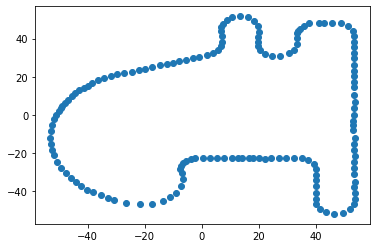

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x_points = []
y_points = []

for point in data:
    x_points.append(point[1][0])
    y_points.append(point[1][1])


plt.scatter(x_points, y_points)
plt.show()

In [73]:
def circuit_diameter(data):
    previous_point = []
    diameter = 0
    for i, point in enumerate(data):
        current_point = point[1]
        if i is not 0:
            dist = (previous_point - current_point) ** 2
            dist = np.sum(dist, axis=0)
            dist = np.sqrt(dist)
            diameter += dist
            # distancia entre el punto y el anterior excepto en el primer punto que no hay. Esa distancia se suma.
        previous_point = point[1]
    return diameter
        
# CIRCUIT LONGITUDE
print('LONGITUDE -> ' + str(circuit_diameter(data)) + ' m')
# AVERAGE SPEED
from datetime import datetime

datetime_object = datetime.strptime(data[len(data)-1][2], '%H:%M:%S.%f')
t = datetime_object.time()
seconds = (t.hour * 60 + t.minute) * 60 + t.second
print('TIME TO COMPLETE LAP -> ' + str(seconds) + ' s')
print('SPEED -> ' + str(circuit_diameter(data)/seconds) + ' m/s')
        

LONGITUDE -> 426.6133159769956 m
TIME TO COMPLETE LAP -> 163 s
SPEED -> 2.6172596072208316 m/s


In [78]:
'''
* Get velocity between each checkpoint
* Plot the velocities with colors.
'''

def get_speed_points(data):
    previous_point = []
    speed_points = []
    for i, point in enumerate(data):
        current_point = point
        if i is not 0:
            # get distance between points
            dist = (previous_point[1] - current_point[1]) ** 2
            dist = np.sum(dist, axis=0)
            dist = np.sqrt(dist)
            # get time between points
            datetime_object = datetime.strptime(current_point[2], '%H:%M:%S.%f')
            t = datetime_object.time()
            seconds_current = (t.hour * 60 + t.minute) * 60 + t.second
            
            datetime_object = datetime.strptime(previous_point[2], '%H:%M:%S.%f')
            t = datetime_object.time()
            seconds_previous = (t.hour * 60 + t.minute) * 60 + t.second
            
            seconds_difference = seconds_current - seconds_previous
            
            speed_points.append(dist/seconds_difference)
            
            
            
        previous_point = point

    return speed_points

def get_average_speed(speed_points):
    speed = 0
    for point in speed_points:
        speed += point
    return speed / len(speed_points)


speed_points = get_speed_points(data)
#print(speed_points)
print(get_average_speed(speed_points))
print()
print()

for point in speed_points:
    print(point)

2.6760154764664255


3.1824419377736017
3.1043781264619112
3.11547827951159
3.1386489390084775
3.365543836875731
3.404119408264232
3.919464428462962
2.8210245791470934
2.78967199037761
3.14217226954325
2.9585476602092005
2.707953688273176
3.291414154851784
3.2601434141422043
2.866369684741214
2.6197951931044816
2.9239658472490344
2.7900915878683206
3.090040523714017
3.45929659330969
3.298801733560271
2.8090447270581187
2.8299445993383046
2.542255725457353
3.172777434129674
2.4839700519146497
1.3999350977180054
2.836816510087935
2.4735930051853234
2.500177876391003
2.298793596423869
1.8871723309869133
2.1887904413254504
1.5959687870491166
2.15984167855223
1.541497544617858
2.1763158813535477
2.7096958936715283
2.4266505112313586
2.4938106118890304
2.5847161875314972
2.574426596368065
1.7217430405601164
1.8190862802246985
1.5789930062625517
1.3992974096793824
1.9358465893239565
2.220253227264196
3.167519349802554
1.8588480503200377
4.140632873136023
2.8820420876304076
3.2675238364602377
